**Importing Libraries**

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from skimage import img_as_float,io,color
from skimage.restoration import denoise_nl_means, estimate_sigma,unsupervised_wiener,wiener
from scipy.signal import convolve2d
from skimage.metrics import peak_signal_noise_ratio

**Reading the Image**

In [ ]:
image = cv2.imread('/content/Liu Bolin.jpg')

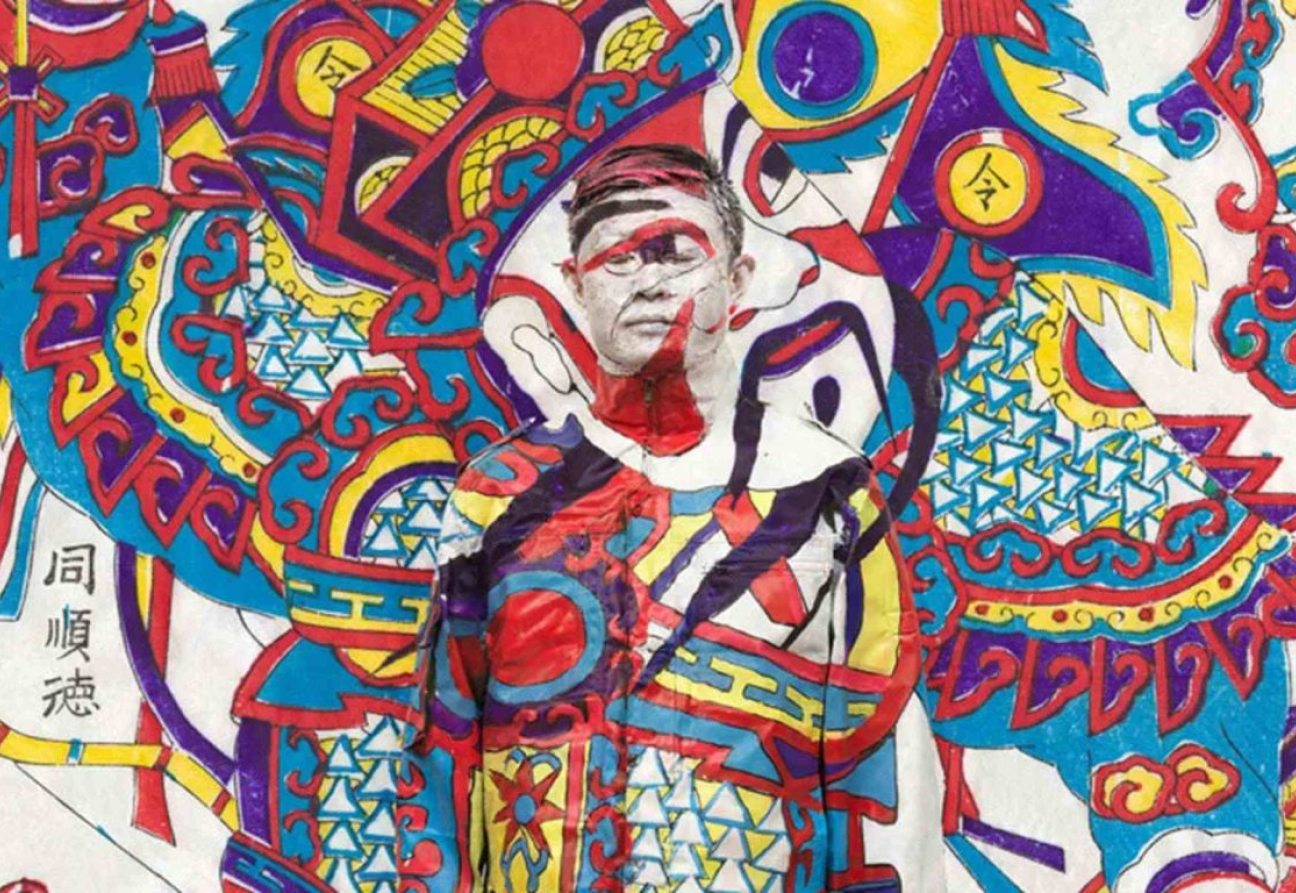

In [ ]:
cv2_imshow(image)

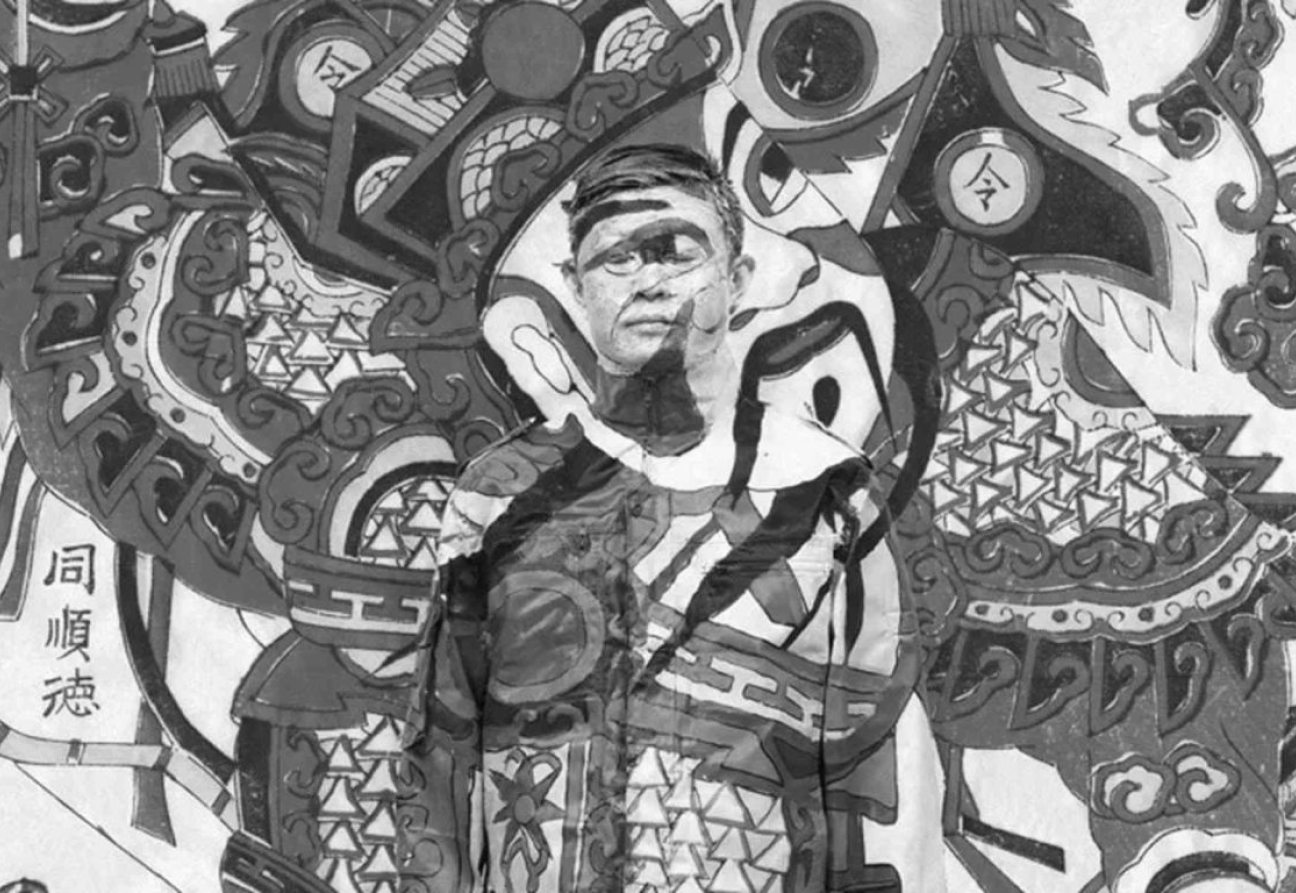

In [ ]:
# Now we convert to gray scale
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

## Adding Noise to the image
* Gaussian Noise
* salt and pepper noise

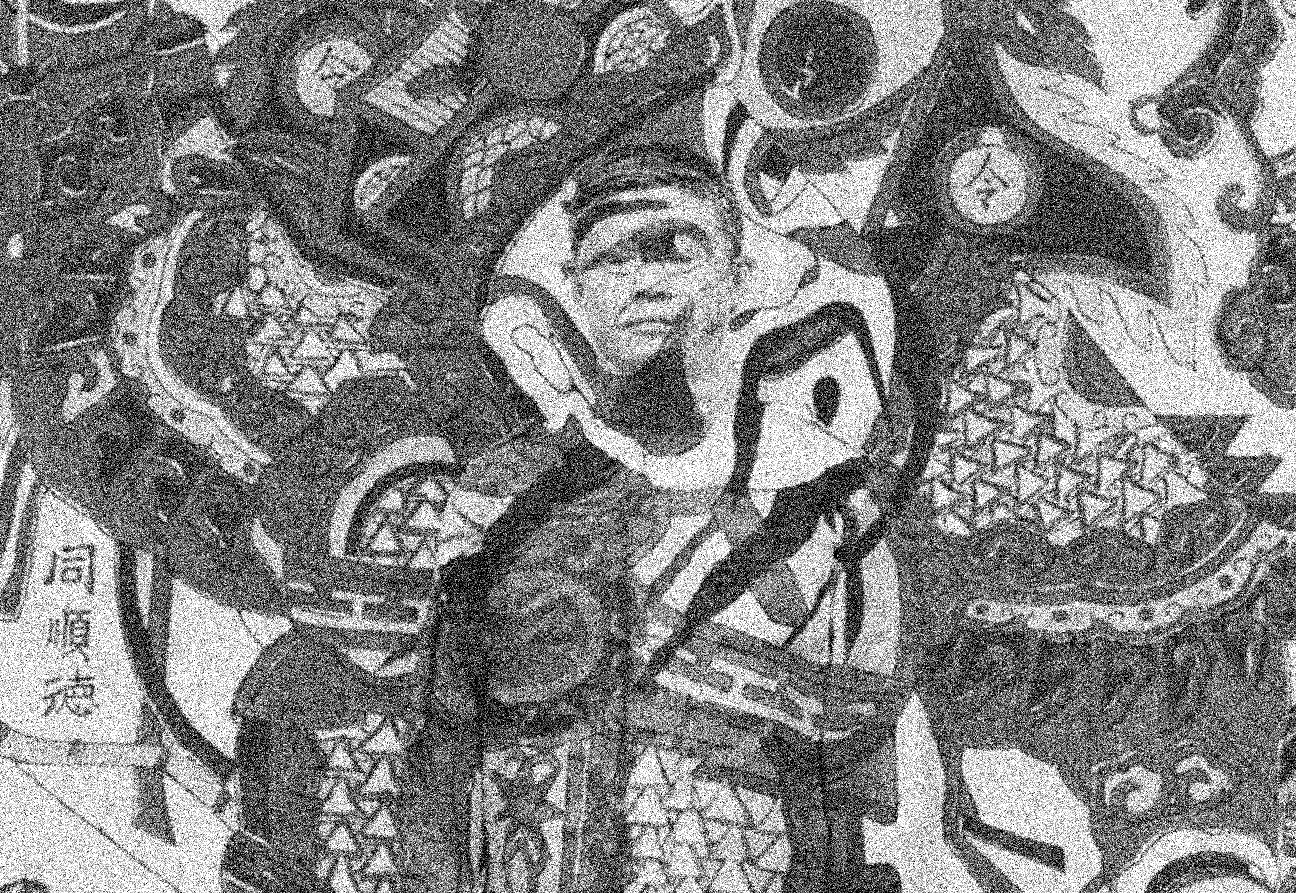

In [ ]:
## Now we add gaussian noise

image_gaus = random_noise(image_gray,mode = 'gaussian', mean = 0, var = 0.075)
image_gaus = 255*image_gaus
image_gaus = image_gaus.astype('uint8')
cv2_imshow(image_gaus)

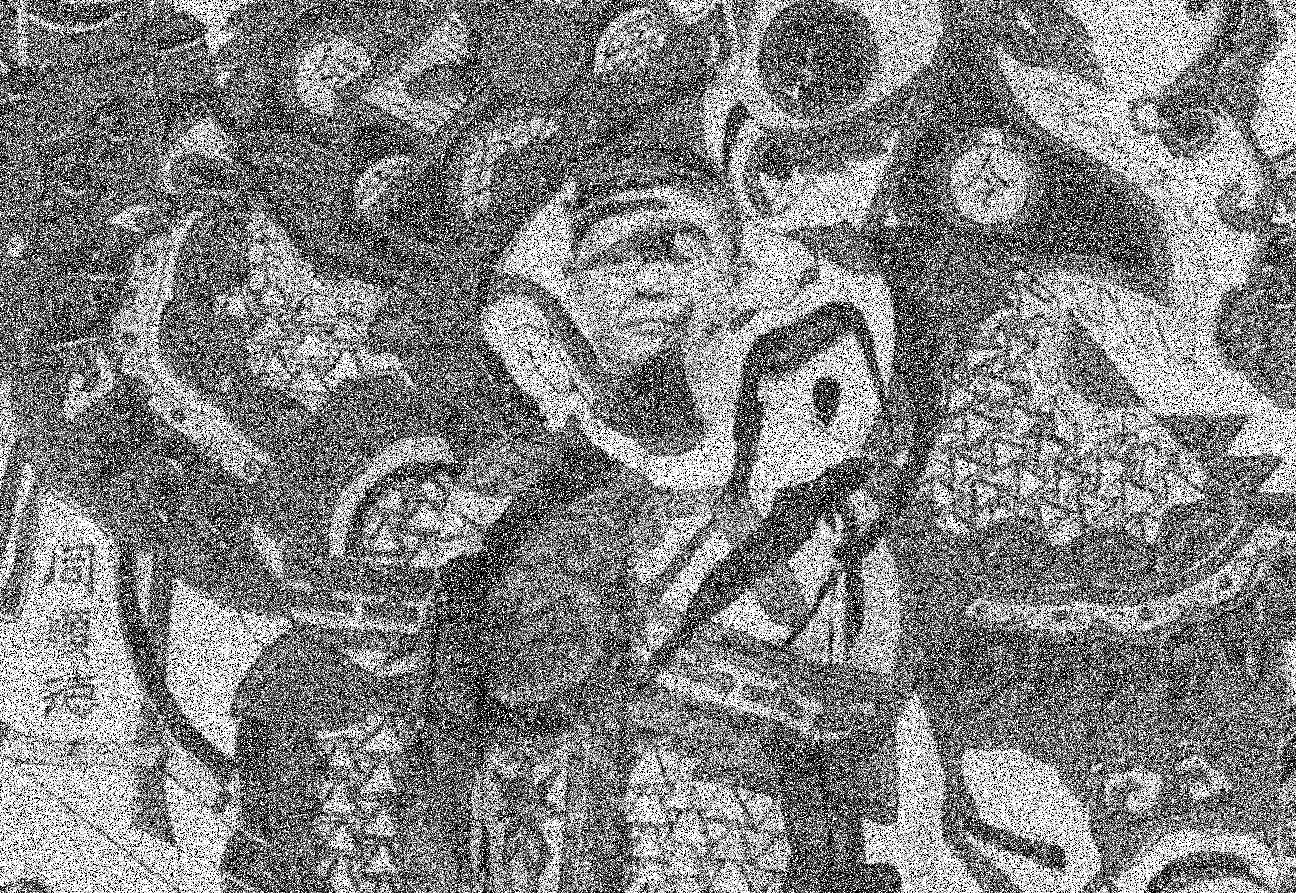

In [ ]:
## Adding salt and pepper noise

image_sp = random_noise(image_gaus, mode = 's&p', amount = 0.25)
image_sp = image_sp*255
image_sp = image_sp.astype('uint8')
cv2_imshow(image_sp)

## Denoising the Image using Non local denoising algorithm
* Calculating Sigma
* Applying denoising_nl_means with proper hyperparameter

<ipython-input-23-ea797d3d48cb>:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(image_sp,multichannel=False))
<ipython-input-23-ea797d3d48cb>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(image_sp, h = 1.15*sigma_est, fast_mode = True,


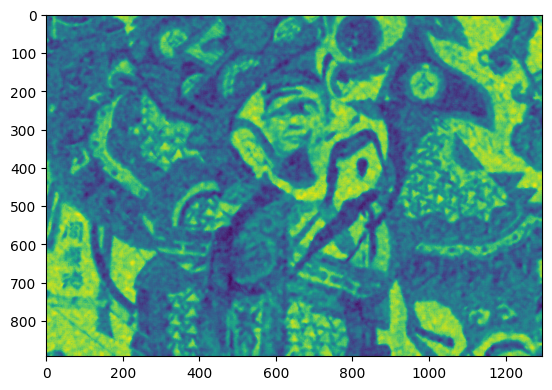

In [ ]:
image_sp = img_as_float(image_sp)
sigma_est = np.mean(estimate_sigma(image_sp,multichannel=False))

denoise_img = denoise_nl_means(image_sp, h = 1.15*sigma_est, fast_mode = True,
                               patch_size = 5,
                               patch_distance = 5,
                               multichannel = False)
plt.imshow(denoise_img) ## Denoised image


# Image Restoration using **wiener** method

In [18]:
img = img_as_float(io.imread('/content/Liu Bolin.jpg'))

In [19]:
# plot function
def display(image):
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

In [20]:
# converting the color image to gray scale
img = color.rgb2gray(img)

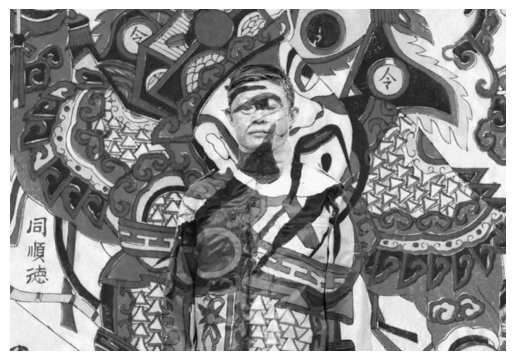

In [21]:
# Visualizing the original image
display(img)

In [23]:
# blur the image
k = 5
psf = np.ones((k,k))/(k*k)

In [24]:
psf

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

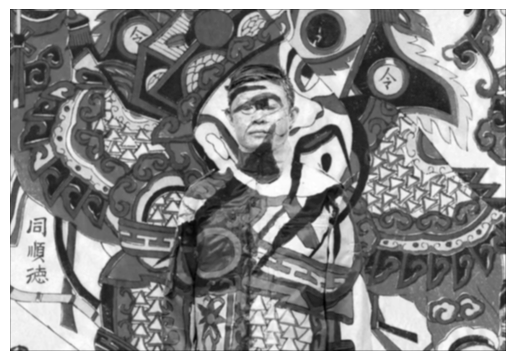

In [25]:
img1 = convolve2d(img,psf,'same')
display(img1)

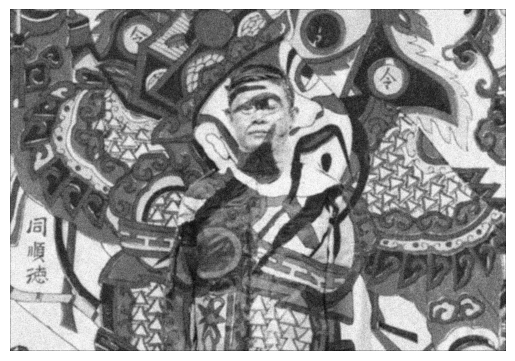

In [26]:
## Add a noise to blur image
img1 = random_noise(img1,mode = 'gaussian')
display(img1)

**Image Restoration**
###### There are two methods for image restoration.
* unsupervised_wiener()
* weiner()

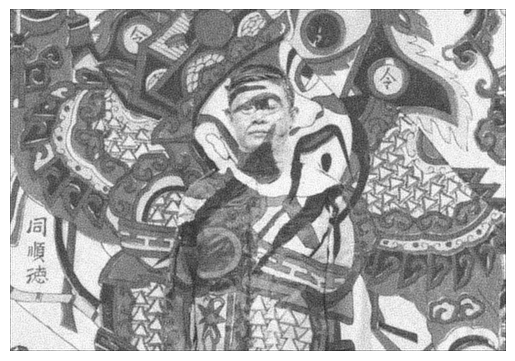

In [28]:
# Image Restoration: unsupervised_wiener()
imgRestor, chains = unsupervised_wiener(img1,psf=psf)
display(imgRestor)

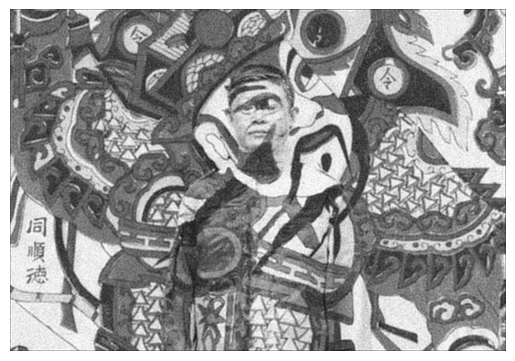

In [29]:
# Image Restoration: wiener()
imgRestor2 = wiener(img1,psf=psf,balance=0.35)
display(imgRestor2)

In [31]:
# Evaluating the result : Which method is better?

psnr0 = peak_signal_noise_ratio(image_true = img, image_test = img1)
psnr1 = peak_signal_noise_ratio(image_true = img, image_test = imgRestor)
psnr2 = peak_signal_noise_ratio(image_true = img, image_test = imgRestor2)

print(f"PSNR blur image: {psnr0:.3f}")
print(f"PSNR method 1: {psnr1:.3f}")
print(f"PSNR method 2: {psnr2:.3f}")

PSNR blur image: 19.563
PSNR method 1: 23.481
PSNR method 2: 26.007


**Conclusion:**
###### We know that **larger the PSNR** value conclude that **better is the restored image.** Here **wiener()** method giving me highest PSNR value. So **wiener()** method works well better that other method.